# Test Filter 2d

## Read Image

In [ ]:
import PIL.Image as image
import numpy as np
import cv2

filename = "eeve.jpeg"
img = image.open(filename).convert('L')
inframe = np.array(img)

img

In [ ]:
img.width

In [9]:
kernel_g = {
        'laplacian high-pass':  np.array([
            [0.0, 1.0, 0],
            [1.0, -4, 1.0],
            [0, 1.0, 0.0]],np.float32),
        'gaussian high-pass': np.array([
            [-0.0625,-0.125,-0.0625],
            [-0.125,0.75,-0.125],
            [-0.0625,-0.125,-0.0625]],np.float32),
        'average blur':  np.ones((3,3),np.float32)/9.0,
        'gaussian blur': np.array([
            [0.0625,0.125,0.0625],
            [0.125,0.25,0.125],
            [0.0625,0.125,0.0625]],np.float32),
        'Sobel Ver': np.array([
            [1.0,0.0,-1.0],
            [2.0,0.0,-2.0],
            [1.0,0.0,-1.0]],np.float32),
        'Sobel Hor': np.array([
            [1.0,2.0,1.0],
            [0.0,0.0,0.0],
            [-1.0,-2.0,-1.0]],np.float32),
        'motion blur': np.array([
            [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]],np.float32)/12,
        'Sharpen': np.array([
            [0,-1,0],
            [-1, 5, -1],
            [0, -1, 0]],np.float32),
        'Sharpen1': np.array([
            [-1,-1, -1],
            [-1, 9, -1],
            [-1, -1, -1]],np.float32),
        'Edge1': np.array([
            [0,1,0],
            [1, -4, 1],
            [0, 1, 0]],np.float32),
        'Edge2': np.array([
            [0,-1,0],
            [-1, 4, -1],
            [0, -1, 0]],np.float32),
        'Edge3': np.array([
            [-1,-1,-1],
            [-1, 8, -1],
            [-1, -1, -1]],np.float32),
}

kernelD = np.ones((3,3),np.uint8)
buf     = np.ones((img.height,img.width),np.uint8)


# implement in FPGA
def test_filter(kernelName):
    kernelVoid = np.zeros(0)
    inframe = np.array(img)
    frame = cv2.filter2D(inframe, -1, kernel_g.get(kernelName), dst=buf)
#     cv2.dilate(buf, kernelVoid, dst=output, borderType=cv2.BORDER_CONSTANT)
    return buf

# edited
def apply_filter(img_in, kernel):
    kernelVoid = np.zeros(0)
    frame = cv2.filter2D(img_in, -1, kernel, dst=buf)
    return frame

In [ ]:
# show kernel
kernel_g.get('Edge3')

Test Filter

In [ ]:
output = test_filter('Edge3')
image.fromarray(output)

In [ ]:
print(inframe)
print(output)

## Canny Edge Detection

In [ ]:
edges = cv2.Canny(np.array(img),100,100)
image.fromarray(edges)

## Test Edge Detection 
. blur image then apply laplace filter

In [ ]:
img2 = apply_filter(inframe, kernel_g.get('gaussian blur'))
img2 = apply_filter(img2, kernel_g.get('Edge3'))
image.fromarray(img2)

In [ ]:
# perbedaannya
print(edges)
print()
print(img2)

## Costumize

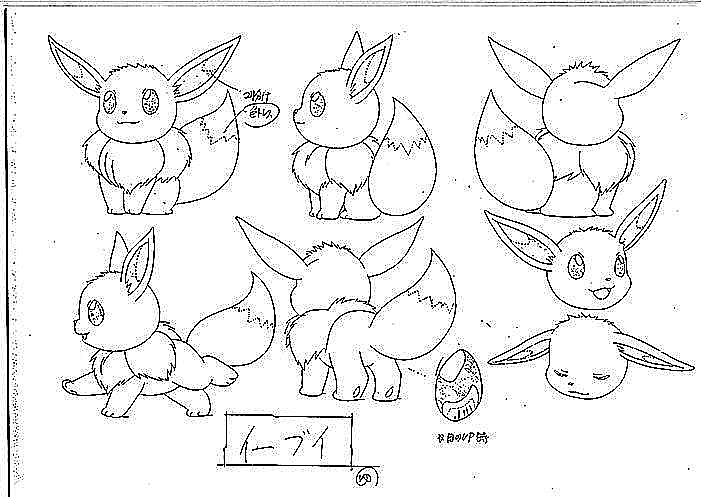

In [10]:
filename = "eeve.jpeg"
imgs = image.open(filename).convert('L')
# imgs = image.open(filename)

inframe1 = np.array(imgs)

thekernel = np.array([
            [-1,-1,-1],
            [-1, 17, -1],
            [-1, -1, -1]],np.float32)

img3 = apply_filter(inframe1, kernel_g.get('Sharpen1'))
# img3 = apply_filter(inframe1, kernel_g.get('Sharpen'))
# img3 = apply_filter(img3, kernel_g.get('average blur'))
# img3 = apply_filter(img3, kernel_g.get('Edge3'))
# img3 = cv2.Canny(img3, 100, 200)
image.fromarray(img3)

In [ ]:
image.fromarray(inframe1)

In [ ]:
print(inframe)
print()
print(img3)